<a href="https://colab.research.google.com/github/Tim-R413/Cover-Crop-Image-Segmentation/blob/master/cc_segmenation_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Semantic segmentation Project:  Covercrop dataset 

##Library preparation:

In [0]:
!git clone https://github.com/Tim-R413/Cover-Crop-Image-Segmentation.git

Cloning into 'Cover-Crop-Image-Segmentation'...
remote: Enumerating objects: 36, done.
remote: Counting objects: 100% (36/36), done.
remote: Compressing objects: 100% (32/32), done.
remote: Total 254 (delta 14), reused 0 (delta 0), pack-reused 218
Receiving objects: 100% (254/254), 205.13 MiB | 40.58 MiB/s, done.
Resolving deltas: 100% (64/64), done.
Checking out files: 100% (95/95), done.


In [0]:

%tensorflow_version 2.x

import tensorflow as tf
import numpy as np
import glob
import os
from PIL import Image , ImageOps


In [0]:
import numpy as np 
import matplotlib.pyplot as plt 
import glob 
import os 

In [0]:
% cd /content/Cover-Crop-Image-Segmentation


/content/Cover-Crop-Image-Segmentation


In [0]:

# function for labeling each pixel in the mask. each value represents a cover crop species

def categorize( pixel ):
    
    if np.array_equal( pixel , [ 81 , 0 , 81 ]):
      # Soil/Background
        return np.array( [ 0 ] )

    if np.array_equal(pixel, [106,142,34]):
        # Canola 
        return np.array( [ 1 ] )

    if np.array_equal( pixel , [ 254, 0, 0 ]):
        # Clover
        return np.array( [ 2 ] )

    if np.array_equal( pixel , [ 0, 0, 230 ]):
        # Triticale
        return np.array( [ 3 ] )

    if np.array_equal( pixel , [ 220, 220, 0 ]):
        # Pea
        return np.array( [ 4 ] )

    if np.array_equal(pixel, [111, 74, 0]):
        # Oat 
        return np.array( [ 5 ] )

    if np.array_equal(pixel, [180, 165, 180]):
        # Radish 
        return np.array( [ 6 ] )
    else:
      # if pixel doesnt have a recognized value above then it is set to background
        return np.array( [ 0 ] )

In [0]:
def list_from_dir(dir_path,image_crop,num_images):
  x = list()
  os.chdir(dir_path)
  dir_filenames = os.listdir(dir_path)
  dir_filenames.sort()
  print(dir_filenames)


  for filename in dir_filenames[0 : num_images]:
    data = Image.open(os.path.join(dir_path,filename))
    x.append(np.asarray(ImageOps.crop(data,(0,0,256,0)).resize((image_crop,image_crop))))
  return x


In [0]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

num_images = 4

crop_size = 128

image_dir = "/content/Cover-Crop-Image-Segmentation/images"
label_dir = "/content/Cover-Crop-Image-Segmentation/masks"

image = list_from_dir( image_dir, crop_size, num_images) 
mask = list_from_dir( label_dir, crop_size, num_images)


##Normalize image array:
image = np.array( image ) / 255
mask = np.array( mask )





['Canola-1.JPG', 'Clover-1.JPG', 'Pea-1.JPG', 'Triticale-1.JPG']
['Canola-1_color_mask.png', 'Clover-1_color_mask.jpg', 'Pea-1_color_mask.png', 'Triticale-1_color_mask.png']


In [0]:
% ls  

Canola-1_color_mask.png  Pea-1_color_mask.png
Clover-1_color_mask.jpg  Triticale-1_color_mask.png


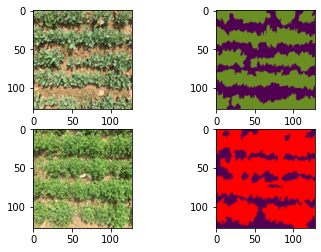

<Figure size 9216x9216 with 0 Axes>

In [0]:
def display_img_mask(images,masks,size):
        fig,a = plt.subplots(2,2)
        plt.figure(figsize=(size,size))
        grid_size = min(16, len(images))
        a[0][0].imshow(images[0], cmap=plt.cm.binary)
        a[0][1].imshow(masks[0],cmap=plt.cm.binary)

        a[1][0].imshow(images[1], cmap=plt.cm.binary)
        a[1][1].imshow(masks[1],cmap=plt.cm.binary)

        #a[0][0].imshow(images[2], cmap=plt.cm.binary)
        #a[0][1].imshow(masks[2],cmap=plt.cm.binary)


       
               

                

display_img_mask(image,mask,crop_size)
plt.show()

In [0]:
train_features, test_features, train_labels, test_labels = train_test_split(np.array(image), np.array(mask),test_size=0.4)


train_labels = np.apply_along_axis( categorize , axis=3 , arr=train_labels ) 
test_labels = np.apply_along_axis( categorize , axis=3 , arr=test_labels ) 
print(" The training set shape is of:",train_labels.shape)
print(" The testing dataset shape is of:", test_labels.shape)



 The training set shape is of: (2, 128, 128, 1)
 The testing dataset shape is of: (2, 128, 128, 1)


### Creating model tensors 

In [0]:
batch_size = 5  

train_dataset = tf.data.Dataset.from_tensor_slices( ( train_features , train_labels ) )
train_dataset = train_dataset.shuffle( 1024 ).batch( batch_size )
test_dataset = tf.data.Dataset.from_tensor_slices( ( test_features , test_labels ) )
test_dataset = test_dataset.shuffle( 1024 ).batch( batch_size )